In [1]:
%matplotlib inline

In [14]:
import sys
sys.path.append("/home/sara/lib")


# Plotting Learning Curves


On the left side the learning curve of a naive Bayes classifier is shown for
the digits dataset. Note that the training score and the cross-validation score
are both not very good at the end. However, the shape of the curve can be found
in more complex datasets very often: the training score is very high at the
beginning and decreases and the cross-validation score is very low at the
beginning and increases. On the right side we see the learning curve of an SVM
with RBF kernel. We can see clearly that the training score is still around
the maximum and the validation score could be increased with more training
samples.



In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [18]:
print(__doc__)

import numpy as np
import pandas as pd
import libopf_py
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def read_csv():
    file = pd.read_csv("csv_dataset/dataframe_features.csv", sep=';')
    return file

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


Programa original, com dados do scikit learn. Esse pedaço abaixo usa apenas os classificadores Naive Bayes e SVM com RBF kernel.

In [4]:
digits = load_digits()
X, y = digits.data, digits.target

In [5]:
print(digits.data)
type(digits.data[0, 2])

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


numpy.float64

In [6]:
print(digits.target)
digits.target
type(digits.target[3])

[0 1 2 ... 8 9 8]


numpy.int64

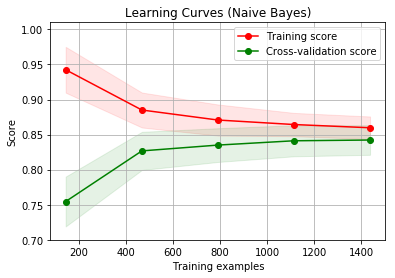

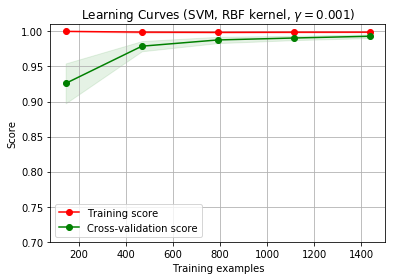

In [7]:
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

Agora coloco no programa os dados da minha base de features. Deixo no mesmo formato da base do scikit learn. 

In [8]:
# meu dataframe
df = read_csv()
df = df.drop(columns='Unnamed: 0')
df = shuffle(df)
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,label
436,0.146907,3.542549,0.012906,1.357939,1.699560,3.214042,0.234082,0.108942,0.457713,0.227733,0.691795,0.336675,0.141794,0.432328,0.132584,0.410813,0.274378,0.843142,2
1628,0.169942,3.732518,0.046924,1.185216,1.945784,3.504745,0.199136,0.162774,0.419816,0.365582,0.618952,0.528356,0.525887,0.246870,0.488436,0.255748,1.014323,0.502619,21
1395,0.195873,3.699391,0.068930,1.209722,1.875996,3.622277,0.237516,0.189002,0.492419,0.398743,0.729934,0.587745,0.375623,0.405191,0.339889,0.383432,0.715512,0.788623,13
1547,0.179191,3.831066,0.027413,1.204476,1.967031,3.684811,0.231091,0.155785,0.495552,0.332194,0.726642,0.487979,0.433462,0.370674,0.360439,0.331967,0.793901,0.702641,21
1056,0.196802,3.726043,0.021871,1.245292,1.832167,3.617706,0.254790,0.176057,0.506517,0.369314,0.761306,0.545371,0.209789,0.344915,0.187857,0.334144,0.397646,0.679059,12


In [9]:
# features
X = df.iloc[0:1924,0:18]
X = X.to_numpy()
X = X.astype('float64')
print(X)

[[0.14690665 3.5425492  0.01290611 ... 0.41081338 0.27437768 0.84314153]
 [0.16994218 3.73251751 0.04692366 ... 0.25574848 1.01432316 0.50261869]
 [0.19587327 3.69939097 0.06893039 ... 0.38343165 0.71551216 0.78862292]
 ...
 [0.07581882 3.76344148 0.36780505 ... 0.62306489 0.88579109 1.28327089]
 [0.17087231 3.66149438 0.46252012 ... 0.60739653 0.95693049 1.25802946]
 [0.14157165 3.6903034  0.33952152 ... 0.51681991 0.89831527 1.03625961]]


In [10]:
# labels
y = df.iloc[0:1924,18]
y = y.to_numpy()
y = y.astype('int64')
print(y)
type(y[3])

[ 2 21 13 ... 12 13 21]


numpy.int64

Aqui eu classifico minha base de features com Naive Bayes e com SVM com kernel linear.

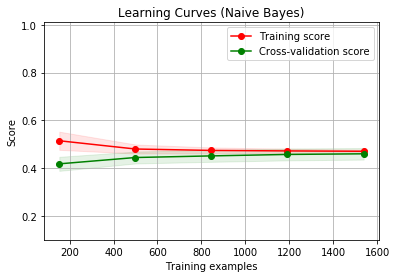

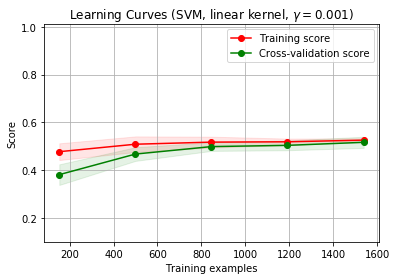

In [11]:
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.1, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, linear kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(kernel='linear', gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.1, 1.01), cv=cv, n_jobs=4)

plt.show()

Aqui eu uso KNN e Decision Tree, também com a minha base.

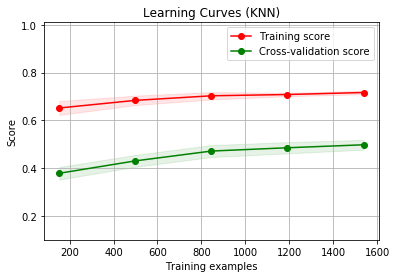

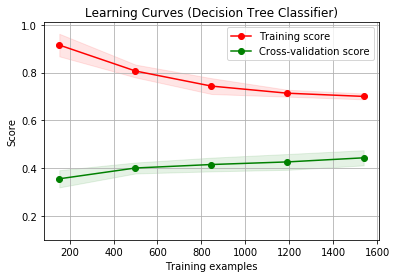

In [12]:
title = "Learning Curves (KNN)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = KNeighborsClassifier(3)
plot_learning_curve(estimator, title, X, y, ylim=(0.1, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (Decision Tree Classifier)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier(max_depth=8)
plot_learning_curve(estimator, title, X, y, (0.1, 1.01), cv=cv, n_jobs=4)

plt.show()

Aqui eu uso Random Forest e AdaBoost, também com a minha base.

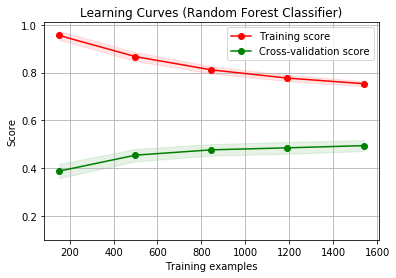

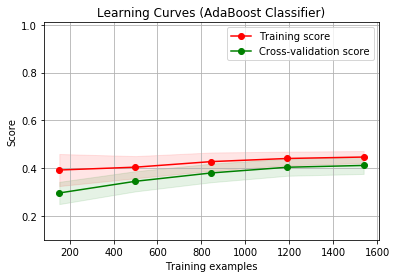

In [13]:
title = "Learning Curves (Random Forest Classifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(max_depth=8, n_estimators=10, max_features=1)
plot_learning_curve(estimator, title, X, y, ylim=(0.1, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (AdaBoost Classifier)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = AdaBoostClassifier()
plot_learning_curve(estimator, title, X, y, (0.1, 1.01), cv=cv, n_jobs=4)

plt.show()

Agora vou tentar com o OPF.

In [ ]:
# adaptações ao OPF.
def opf(train_labels1, train_feat1, test_labels1, test_feat1):
        
    # OPF only supports 32 bits labels at the moment
    label_train_32 = train_labels1.astype(np.int32)
    label_test_32 = test_labels1.astype(np.int32)

    O = libopf_py.OPF()

    O.fit(train_feat1, label_train_32)

    predicted = O.predict(test_feat1)
    name = "OPF"
    acc = accuracy_score(label_test_32, predicted)
    
    return acc  

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <libopf_py.OPF object at 0x7f4084d11ab0> does not.

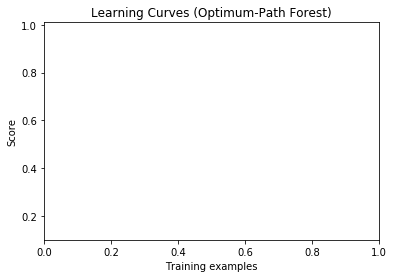

In [19]:
title = r"Learning Curves (Optimum-Path Forest)"
O = libopf_py.OPF()

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = libopf_py.OPF()
plot_learning_curve(estimator, title, X, y, (0.1, 1.01), cv=cv, n_jobs=4)

plt.show()